# <center>数据挖掘2023-数据探索性分析与数据预处理<center>

# <center>1120193405  许阳霄  07111908班<center> 

本次作业选择GitHub Dataset和MovieLens 10M Dataset两个数据集进行探索性分析与预处理。<br>
github地址：https://github.com/Xuyangxiao0604/BIT-DataMining

## 1、GitHub Dataset

（1）加载数据集，探索数据集基本形状。

In [3]:
import pandas as pd
import numpy as np

# 加载数据集
github_df = pd.read_csv('GitHub_Dataset/github_dataset.csv')
repository_df = pd.read_csv('GitHub_Dataset/repository_data.csv')

## github_dataset.csv数据集的前几行
print("github_dataset.csv数据集的前几行：\n", github_df.head())

## repository_data.csv数据集的前几行
print("repository_data.csv数据集的前几行：\n", repository_df.head())

github_dataset.csv数据集的列：
                 repositories  stars_count  forks_count  issues_count  \
0        octocat/Hello-World            0            0           612   
1  EddieHubCommunity/support          271          150           536   
2             ethereum/aleth            0            0           313   
3      localstack/localstack            0            0           290   
4        education/classroom            0          589           202   

   pull_requests  contributors language  
0            316             2      NaN  
1              6            71      NaN  
2             27           154      C++  
3             30           434   Python  
4             22            67     Ruby  
repository_data.csv数据集的列：
                           name  stars_count  forks_count  watchers  \
0                 freeCodeCamp       359805        30814      8448   
1                      996.ICU       264811        21470      4298   
2       free-programming-books       262380        5

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;可以看到，数据集有7个列，分别是repositories，stars_count，forks_count，issues_count，pull_requests，contributors和language，其中，标称属性为repositories和language,数值属性为stars_count、forks_count、issues_count、pull_requests和contributors。

（2）数据摘要<br>
&nbsp;&nbsp;&nbsp;&nbsp;·标称属性，给出每个可能取值的频数<br> 
&nbsp;&nbsp;&nbsp;&nbsp;·数值属性，给出5数概括及缺失值的个数

In [4]:
# 标称属性的频数统计
print("repositories标称属性频数统计：")
print(github_df['repositories'].value_counts())
print("\nlanguage标称属性频数统计：")
print(github_df['language'].value_counts())

repositories标称属性频数统计：
kameshsampath/ansible-role-rosa-demos         2
aloisdeniel/bluff                             2
antoniaandreou/github-slideshow               2
jgthms/bulma-start                            2
artkirienko/hlds-docker-dproto                2
                                             ..
WhiteHouse/CIOmanagement                      1
0xCaso/defillama-telegram-bot                 1
ethereum/blake2b-py                           1
openfoodfacts/folksonomy_mobile_experiment    1
gamemann/All_PropHealth                       1
Name: repositories, Length: 972, dtype: int64

language标称属性频数统计：
JavaScript          253
Python              155
HTML                 72
Java                 44
CSS                  37
TypeScript           37
Dart                 36
C++                  29
Jupyter Notebook     29
Ruby                 28
C                    26
Shell                25
PHP                  16
Go                   15
Rust                 10
Swift                10
C

In [5]:
# 数值属性的五数概括及缺失值个数
print("\nstars_count数值属性五数概括：")
print(github_df['stars_count'].describe())
print("\nforks_count数值属性五数概括：")
print(github_df['forks_count'].describe())
print("\nissues_count数值属性五数概括：")
print(github_df['issues_count'].describe())
print("\npull_requests数值属性五数概括：")
print(github_df['pull_requests'].describe())
print("\ncontributors数值属性五数概括：")
print(github_df['contributors'].describe())


stars_count数值属性五数概括：
count    1052.000000
mean       81.976236
std       170.403116
min         0.000000
25%         1.000000
50%        12.000000
75%        65.250000
max       995.000000
Name: stars_count, dtype: float64

forks_count数值属性五数概括：
count    1052.000000
mean       53.884981
std       127.699729
min         0.000000
25%         1.000000
50%         6.000000
75%        38.250000
max       973.000000
Name: forks_count, dtype: float64

issues_count数值属性五数概括：
count    1052.000000
mean        8.656844
std        32.445154
min         1.000000
25%         1.000000
50%         2.000000
75%         6.000000
max       612.000000
Name: issues_count, dtype: float64

pull_requests数值属性五数概括：
count    1052.000000
mean        4.374525
std        27.913732
min         0.000000
25%         0.000000
50%         0.000000
75%         2.000000
max       567.000000
Name: pull_requests, dtype: float64

contributors数值属性五数概括：
count    1052.000000
mean        8.364068
std        37.511807
min         

In [8]:
# 属性的缺失值个数
print("\nrepositories数值属性缺失值个数：")
print(github_df['repositories'].isnull().sum())
print("\nstars_count数值属性缺失值个数：")
print(github_df['stars_count'].isnull().sum())
print("\nforks_count数值属性缺失值个数：")
print(github_df['forks_count'].isnull().sum())
print("\nissues_count数值属性缺失值个数：")
print(github_df['issues_count'].isnull().sum())
print("\npull_requests数值属性缺失值个数：")
print(github_df['pull_requests'].isnull().sum())
print("\ncontributors数值属性缺失值个数：")
print(github_df['contributors'].isnull().sum())
print("\nlanguage数值属性缺失值个数：")
print(github_df['language'].isnull().sum())


repositories数值属性缺失值个数：
0

stars_count数值属性缺失值个数：
0

forks_count数值属性缺失值个数：
0

issues_count数值属性缺失值个数：
0

pull_requests数值属性缺失值个数：
0

contributors数值属性缺失值个数：
0

language数值属性缺失值个数：
145


(3)数据可视化<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;使用直方图、盒图等检查数据分布及离群点。将五个数值属性的直方图和盒图统一画在一张画布上，以（5，2）格局分布，其中左列为直方图，右列为盒图，从第一排到第五排分别对应stars_count、forks_count、issues_count、pull_requests和contributors属性的直方图和盒图。

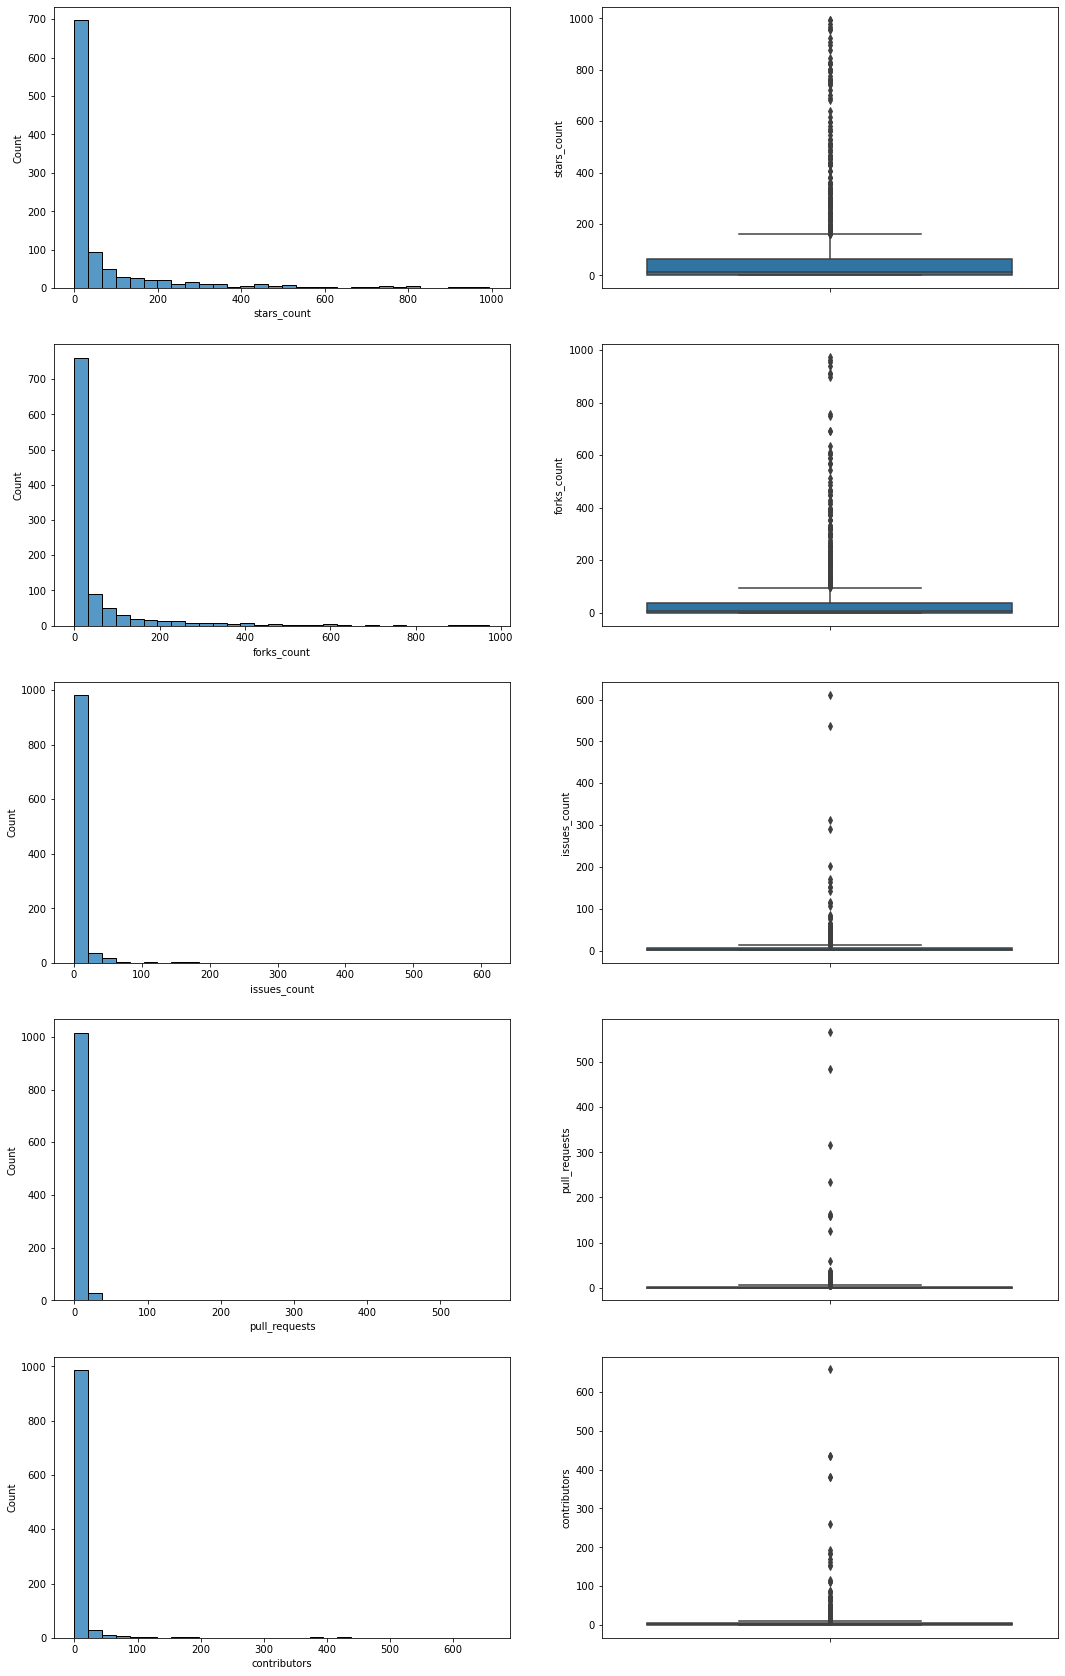

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# 可视化
fig, axes = plt.subplots(5, 2, figsize=(18, 30))
sns.histplot(ax=axes[0, 0], data=github_df, x='stars_count', bins=30)
sns.boxplot(ax=axes[0, 1], data=github_df, y='stars_count')
sns.histplot(ax=axes[1, 0], data=github_df, x='forks_count', bins=30)
sns.boxplot(ax=axes[1, 1], data=github_df, y='forks_count')
sns.histplot(ax=axes[2, 0], data=github_df, x='issues_count', bins=30)
sns.boxplot(ax=axes[2, 1], data=github_df, y='issues_count')
sns.histplot(ax=axes[3, 0], data=github_df, x='pull_requests', bins=30)
sns.boxplot(ax=axes[3, 1], data=github_df, y='pull_requests')
sns.histplot(ax=axes[4, 0], data=github_df, x='contributors', bins=30)
sns.boxplot(ax=axes[4, 1], data=github_df, y='contributors')
plt.show()

（4）数据缺失的处理<br>
&nbsp;&nbsp;&nbsp;&nbsp;可以观察到，language属性有缺失值，即部分仓库的语言数据存在缺失。推测原因可能是数据收集记录时遗漏。<br>
&nbsp;&nbsp;&nbsp;&nbsp;下列四种策略可以对缺失值进行处理:<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;·将缺失部分剔除<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;·用最高频率值来填补缺失值<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;·通过属性的相关关系来填补缺失值<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;·通过数据对象之间的相似性来填补缺失值<br>
&nbsp;&nbsp;&nbsp;&nbsp;本数据集的各种数据指标无法与所使用的语言进行关联，所以这里采取策略1和策略2进行处理。

In [10]:
# 缺失值处理策略1：将缺失部分剔除
github_df_dropna = github_df.dropna()

# 缺失值处理策略2：用最高频率值来填补缺失值
github_df_fillna_mode = github_df.fillna(github_df.mode().iloc[0])

# 对比新旧数据集的差异
print(f"原始数据集缺失值数量：\n{github_df.isna().sum()}\n")
print(f"处理后的数据集1（将缺失部分剔除）缺失值数量：\n{github_df_dropna.isna().sum()}\n")
print(f"处理后的数据集2（用最高频率值来填补缺失值）缺失值数量：\n{github_df_fillna_mode.isna().sum()}\n")

原始数据集缺失值数量：
repositories       0
stars_count        0
forks_count        0
issues_count       0
pull_requests      0
contributors       0
language         145
dtype: int64

处理后的数据集1（将缺失部分剔除）缺失值数量：
repositories     0
stars_count      0
forks_count      0
issues_count     0
pull_requests    0
contributors     0
language         0
dtype: int64

处理后的数据集2（用最高频率值来填补缺失值）缺失值数量：
repositories     0
stars_count      0
forks_count      0
issues_count     0
pull_requests    0
contributors     0
language         0
dtype: int64



## 2、MovieLens 10M Dataset

（1）加载数据集，探索数据集基本形状。

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 加载数据
movies_df = pd.read_csv('ml-10M100K/movies.dat', sep='::', engine='python', header=None, names=['movieId', 'title', 'genres'])
ratings_df = pd.read_csv('ml-10M100K/ratings.dat', sep='::', engine='python', header=None, names=['userId', 'movieId', 'rating', 'timestamp'])
tags_df = pd.read_csv('ml-10M100K/tags.dat', sep='::', engine='python', header=None, names=['userId', 'movieId', 'tag', 'timestamp'])

## movies.dat数据集的前几行
print("movies.dat数据集的前几行：\n", movies_df.head())

## ratings.dat数据集的前几行
print("ratings.dat数据集的前几行：\n", ratings_df.head())

## tags.dat数据集的前几行
print("tags.dat数据集的前几行：\n", tags_df.head())

movies.dat数据集的前几行：
    movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  
ratings.dat数据集的前几行：
    userId  movieId  rating  timestamp
0       1      122     5.0  838985046
1       1      185     5.0  838983525
2       1      231     5.0  838983392
3       1      292     5.0  838983421
4       1      316     5.0  838983392
tags.dat数据集的前几行：
    userId  movieId              tag   timestamp
0      15     4973       excellent!  1215184630
1      20     1747    

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;可以看到，movies.dat数据集有3个列，分别是MovieID、Title和Genres，全为标称属性；ratings.dat数据集有4个列，分别是UserID、MovieID、Rating和Timestamp，全为数值属性；tags.dat数据集有4个列，分别是UserID、MovieID、Tag和Timestamp，其中，标称属性为Tag,数值属性为userId、movieId和timestamp。

（2）数据摘要<br>
&nbsp;&nbsp;&nbsp;&nbsp;·标称属性，给出每个可能取值的频数<br> 
&nbsp;&nbsp;&nbsp;&nbsp;·数值属性，给出5数概括及缺失值的个数

In [14]:
# 数据摘要

# movies.dat数据集标称属性的频数统计
print("movies.dat数据集标称属性频数统计：")
print(movies_df['genres'].value_counts())

# ratings.dat数据集数值属性的五数概括
print("\nratings.dat数据集数值属性五数概括：")
print(ratings_df.describe())

# ratings.dat数据集数值属性的缺失值个数
print("\nratings.dat数据集数值属性缺失值个数：")
print(ratings_df.isnull().sum())

#tags.dat数据集数值属性的五数概括
print("\ntags.dat数据集数值属性五数概括：")
print(tags_df.describe())

#tags.dat数据集数值属性的缺失值个数
print("\ntags.dat数据集数值属性缺失值个数：")
print(tags_df.isnull().sum())

movies.dat数据集标称属性频数统计：
Drama                                      1817
Comedy                                     1047
Comedy|Drama                                551
Drama|Romance                               412
Comedy|Romance                              379
                                           ... 
Animation|Fantasy|Horror                      1
Action|Fantasy|Mystery|Thriller               1
Action|Adventure|Romance|Thriller             1
Documentary|Drama|Romance|War                 1
Action|Adventure|Fantasy|Horror|Romance       1
Name: genres, Length: 797, dtype: int64

ratings.dat数据集数值属性五数概括：
             userId       movieId        rating     timestamp
count  1.000005e+07  1.000005e+07  1.000005e+07  1.000005e+07
mean   3.586986e+04  4.120291e+03  3.512422e+00  1.032606e+09
std    2.058534e+04  8.938402e+03  1.060418e+00  1.159640e+08
min    1.000000e+00  1.000000e+00  5.000000e-01  7.896520e+08
25%    1.812300e+04  6.480000e+02  3.000000e+00  9.467659e+08
50%    3.574

(3)数据可视化<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;使用直方图、盒图等检查数据分布及离群点。画出电影类型的genres属性的直方图、电影评分的rating属性的盒图以及电影标签的tag属性的直方图。

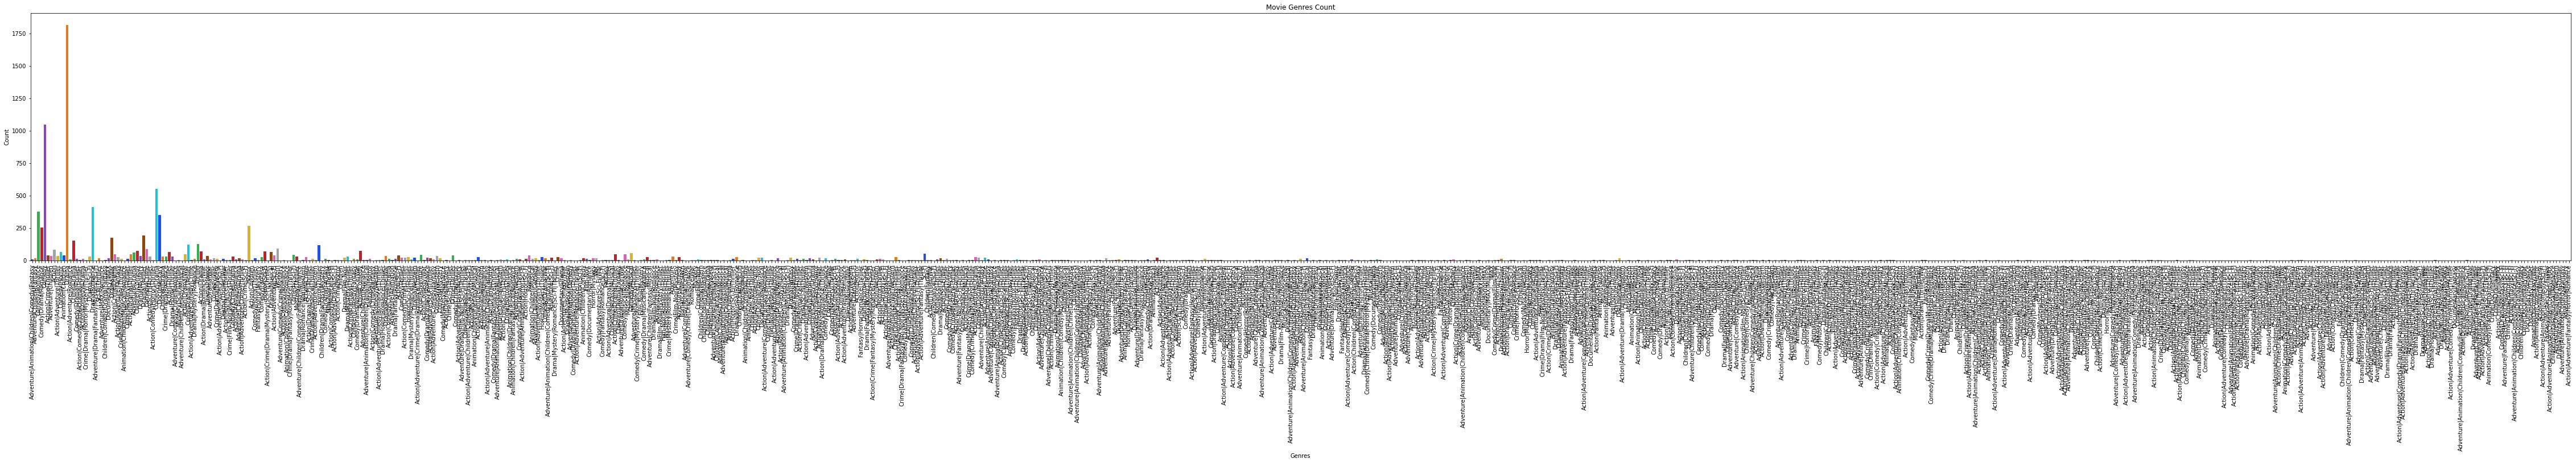

In [15]:
# 电影类型直方图
plt.figure(figsize=(80,8))
sns.countplot(x='genres', data=movies_df, palette='bright')
plt.title("Movie Genres Count")
plt.xlabel("Genres")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

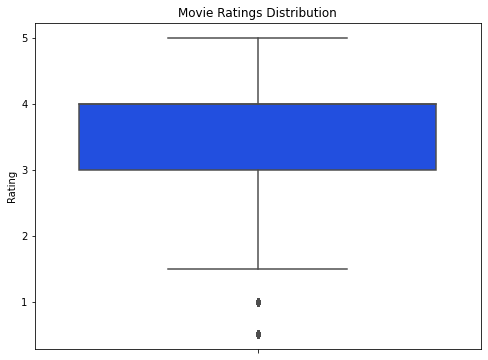

In [16]:
# 电影评分盒图
plt.figure(figsize=(8,6))
sns.boxplot(y='rating', data=ratings_df, palette='bright')
plt.title("Movie Ratings Distribution")
plt.ylabel("Rating")
plt.show()

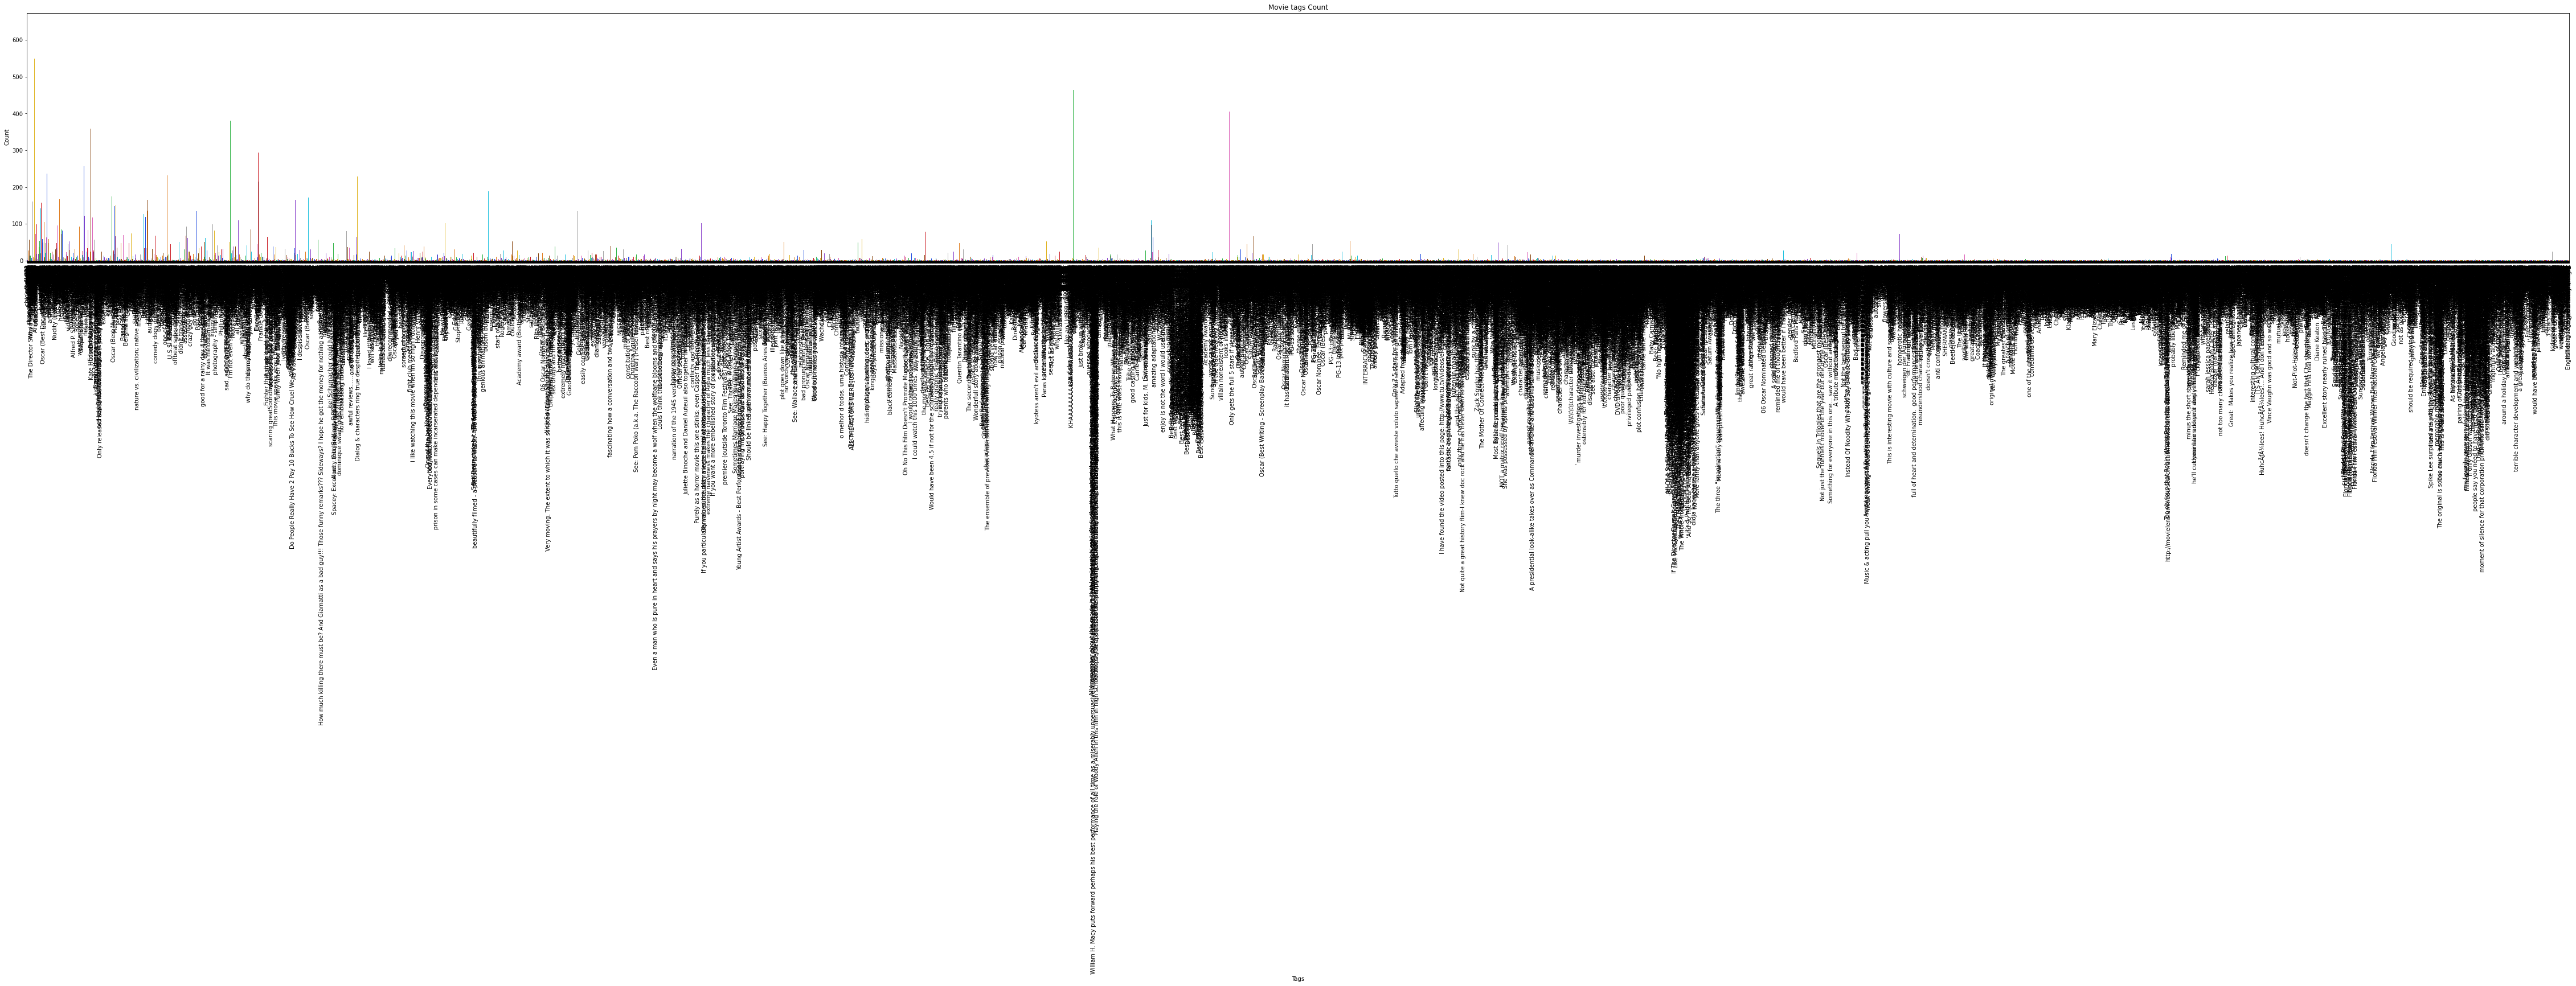

In [17]:
# 电影标签直方图
plt.figure(figsize=(80,8))
sns.countplot(x='tag', data=tags_df, palette='bright')
plt.title("Movie tags Count")
plt.xlabel("Tags")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

（4）数据缺失的处理<br>
&nbsp;&nbsp;&nbsp;&nbsp;可以观察到，language属性有缺失值，即部分仓库的语言数据存在缺失。推测原因可能是数据收集记录时遗漏。<br>
&nbsp;&nbsp;&nbsp;&nbsp;下列四种策略可以对缺失值进行处理:<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;·将缺失部分剔除<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;·用最高频率值来填补缺失值<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;·通过属性的相关关系来填补缺失值<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;·通过数据对象之间的相似性来填补缺失值<br>

&nbsp;&nbsp;&nbsp;&nbsp;Ⅰ.movies.dat数据集中，genres属性有缺失值，可以采取策略1删除缺失值的方法。

In [18]:
# 将缺失部分剔除
movies_dropna = movies_df.dropna(subset=['genres'])

# 对比处理前后的数据集
print("原始数据集电影类型属性的缺失值数量：", movies_df['genres'].isnull().sum())
print("处理后的数据集电影类型属性的缺失值数量：", movies_dropna['genres'].isnull().sum())

原始数据集电影类型属性的缺失值数量： 0
处理后的数据集电影类型属性的缺失值数量： 0


&nbsp;&nbsp;&nbsp;&nbsp;Ⅱ.tags.dat数据集中，tags属性有缺失值，可以采取策略2用高频率值填补的方法。

In [24]:
# 用最高频率值来填补缺失值
tags_df_fillna_mode = tags_df.fillna(tags_df.mode().iloc[0])

# 对比处理前后的数据集
print("原始数据集电影标签属性的缺失值数量：", tags_df['tag'].isnull().sum())
print(f"处理后的数据集电影标签属性的缺失值数量：", tags_df_fillna_mode['tag'].isnull().sum())

原始数据集电影标签属性的缺失值数量： 16
处理后的数据集电影标签属性的缺失值数量： 0
